# MST Vincolato
Dato un grafo non orientato e non completo, e dato un nodo r, si determini l’albero di copertura di radice r che minimizza il numero di figli di ogni nodo -1 (dato un albero di copertura, orientato a partire dalla radice, ogni nodo i non foglia ha ki ≥ 1 figli. Si minimizza la somma su tutti i nodi i non foglia di ki-1)

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

* inizializza grafo e strutture
    * 
* crea una soluzione ammissibile (es. con Kruskal)
* Migliora e imponi i vincoli con ricerca locale
    * aggiungi un arco all'MST
    * rimuovi un arco del ciclo che si è venuto a creare
    * calcola la nuova funzione obiettivo
        * pensa a fattori di penalizzazione per nodi con + figli?
    * ripeti :)
* 

### Inizializzazione

In [26]:
MAX_NODES = 6
INSTANCE_PATH = ""

# importa grafo da file


G = nx.Graph()
G.add_nodes_from([
    x for x in range(1, MAX_NODES+1)
])

G.add_edges_from([
    (x,y) for x in range(1, MAX_NODES+1)
          for y in range(x+1, MAX_NODES+1)
])

# Rendiamo il grafo non completo
G.remove_edges_from([
    (1,4), (3,6), (5,3), (4,5)
])


In [28]:
# Alcune funzioni di supporto

def draw_graph(graph, MST=nx.empty_graph(), root_node=0):
    # adapted from:
    # https://stackoverflow.com/questions/60164893/highlighting-certain-nodes-edges-in-networkx-issues-with-using-zip

    #nx.draw_shell(graph, with_labels=True, font_weight='bold')
    #nx.draw_shell(MST, with_labels=True, font_weight='bold', edge_color='red')
    
    # Get position using spring layout
    #pos = nx.spring_layout(graph, seed=1234)
    pos = nx.circular_layout(graph)

    # Get MST path
    path_edges = list(MST.edges)


    # Draw nodes and edges not included in the MST path
    #nx.draw_networkx_nodes(graph, pos, nodelist=set(graph.nodes)-set(MST.nodes))
    nx.draw_networkx_nodes(graph, pos, nodelist=graph.nodes)
    nx.draw_networkx_edges(graph, pos, edgelist=set(graph.edges)-set(path_edges), edge_color='grey', connectionstyle='arc3, rad = 0.3')

    # Draw MST path
    # highlight the root node
    if root_node != None:
        nx.draw_networkx_nodes(graph, pos, nodelist=[root_node], node_color='yellow')

    nx.draw_networkx_edges(graph,pos,edgelist=path_edges, edge_color='r', connectionstyle='arc3, rad = 0.3')

    # Draw labels
    nx.draw_networkx_labels(graph,pos)



In [33]:
# Funzione obiettivo

def cost(MST, root_node):
    
    cost = 0

    for node in MST.nodes:
        k_children = MST.out_degree(node) # 0 archi uscenti se node è foglia
        if k_children > 0:
            cost += k_children - 1
        
    return cost




## Ricerca Locale
1) crea una soluzione ammissibile (es. con Kruskal)
2) Migliora e imponi i vincoli con ricerca locale
    * aggiungi un arco all'MST
    * rimuovi un arco del ciclo che si è venuto a creare
    * calcola la nuova funzione obiettivo
        * pensa a fattori di penalizzazione per nodi con + figli?
    * ripeti :)

In [29]:
# Creazione di MST ammissibile a partire da nodo radice scelto
# tramite visita in profondità
def build_rooted_mst(graph, root_node):
    visited_nodes = [] # per evitare cicli

    MST = nx.DiGraph()

    n1 = root_node
    #MST.add_node(n1) # non necessario, aggiunti in automatico con gli archi

    # assicuriamoci di partire dal nodo radice
    for n2 in graph.neighbors(n1):
        if n2 not in visited_nodes:
            visited_nodes.append(n2)
            MST.add_edge(n1,n2)
                

    # ora facciamo lo stesso per gli altri nodi
    nodes = graph.nodes
    for n1 in nodes:
        for n2 in graph.neighbors(n1):
            if n2 not in visited_nodes:
                visited_nodes.append(n2)
                MST.add_edge(n1,n2)


    return MST

k-1) MST:  [(1, 2), (1, 3), (1, 5), (1, 6), (2, 1), (2, 4)] costo: -10


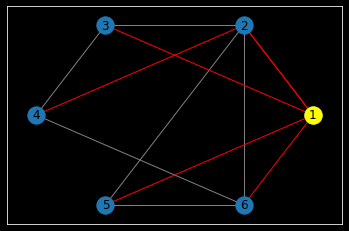

In [30]:
ROOT=1

mst = build_rooted_mst(G, ROOT)
print("k-1) MST: ", mst.edges, "costo:", -10)
draw_graph(G, mst, ROOT)

In [36]:
cost(mst, ROOT)

4